In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('archive\household_power_consumption.txt',sep=';',parse_dates={'date_time' : ['Date', 'Time']}, infer_datetime_format=True,na_values=['nan','?'])

In [3]:
data.head()

,date_time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
#shape of data
data.shape

(2075259, 8)

In [5]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


### Active Power: The is the consumable power for devices. It powers the electric ciruits or loads in an environment. If the voltage is not high enough the active power can not be supplied.It is measured in KW or MW.

### Reactive Power: Reactive power is used to provide the voltage levels necessary for active power to do useful work.Reactive power is essential to move active power through the transmission and distribution system to the customer. It is measured in KVAR or MVAR


In [6]:
# checking for duplicates
duplicate_sum =data.duplicated().sum()
print(duplicate_sum)

0


In [7]:
# checking for null cells
null_cells = data.isnull().sum()
print(null_cells)

date_time                    0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


In [8]:
# Filling up the null cells
for i in range(1,8):
    data.iloc[:,i]=data.iloc[:,i].fillna(data.iloc[:,i].value_counts().index[0])    

In [9]:
# confirmation of filled null cells
null_cells = data.isnull().sum()
print(null_cells)

date_time                0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


# VISUALIZATION

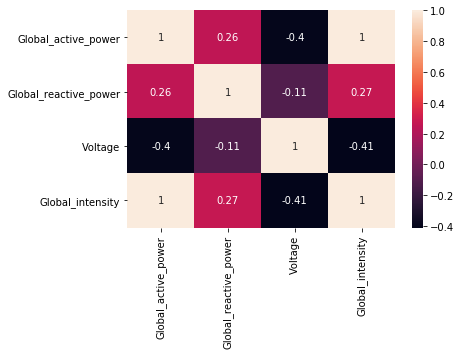

In [10]:
# 1
# Global features
cor =  data[['Global_active_power','Global_reactive_power', 'Voltage','Global_intensity']]
sns.heatmap(cor.corr(), annot = True)
plt.show()

#### Since global active power and global intensity are totally correlated, global active power will be used only.

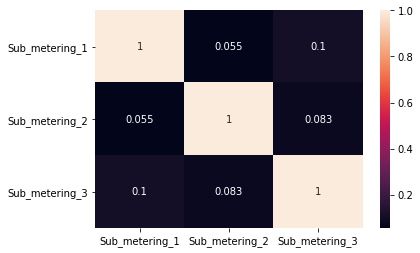

In [11]:
# Sub meterings
# 2
sub_corr =  data[['Sub_metering_1','Sub_metering_2', 'Sub_metering_3']]
sns.heatmap(sub_corr.corr(), annot = True)
plt.show()

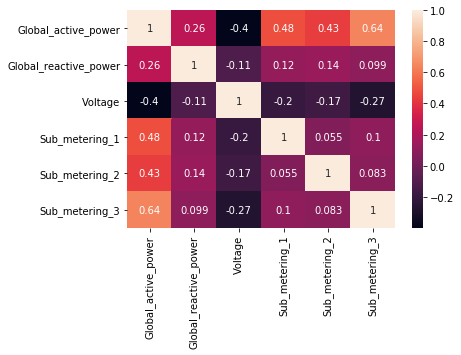

In [12]:
# 3
# everything
evt_corr =  data[['Global_active_power','Global_reactive_power', 'Voltage','Sub_metering_1','Sub_metering_2', 'Sub_metering_3']]
sns.heatmap(evt_corr.corr(), annot = True)
plt.show()

### Trend Across the Whole data

In [13]:
vdata = data.set_index('date_time')


In [14]:
vdata=vdata.astype(float)

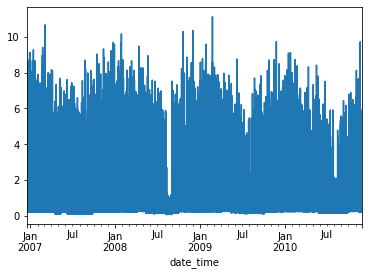

In [15]:
# Global active power trend
vdata['Global_active_power'].plot()

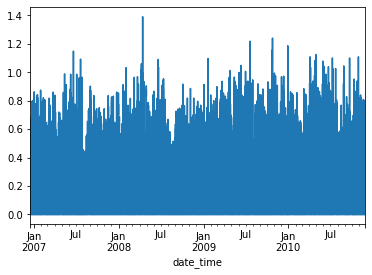

In [16]:
# Global reactive power trend
vdata['Global_reactive_power'].plot()

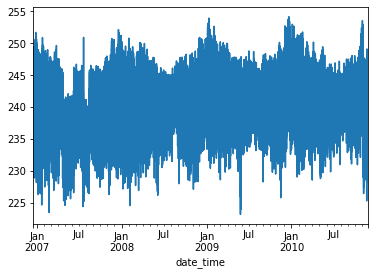

In [17]:
# Voltage trend
vdata['Voltage'].plot()

C:\Users\Kenechi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


(array([1.20760959e+00, 2.71938466e-01, 1.26759176e-01, 4.60364126e-01,
        2.17213387e-01, 1.12549187e-01, 9.47494020e-02, 6.30628798e-02,
        4.04352584e-02, 3.95845959e-02, 2.76007250e-02, 1.62476529e-02,
        1.13373675e-02, 8.46343710e-03, 5.79366569e-03, 4.72183100e-03,
        2.92366143e-03, 1.61756738e-03, 1.03519078e-03, 6.07242124e-04,
        5.53584953e-04, 4.09626691e-04, 1.40032128e-04, 9.03010917e-05,
        4.97310360e-05, 2.35568065e-05, 2.09393836e-05, 7.85226884e-06,
        3.92613442e-06, 1.30871147e-06]),
 array([ 0.076 ,  0.4442,  0.8124,  1.1806,  1.5488,  1.917 ,  2.2852,
         2.6534,  3.0216,  3.3898,  3.758 ,  4.1262,  4.4944,  4.8626,
         5.2308,  5.599 ,  5.9672,  6.3354,  6.7036,  7.0718,  7.44  ,
         7.8082,  8.1764,  8.5446,  8.9128,  9.281 ,  9.6492, 10.0174,
        10.3856, 10.7538, 11.122 ]),
 <a list of 30 Patch objects>)

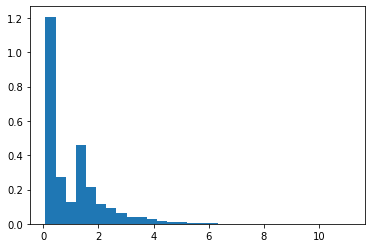

In [18]:
# Global active power
plt.hist(vdata['Global_active_power'], bins=30, normed=True)

C:\Users\Kenechi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


(array([5.47179340e+00, 4.63625584e+00, 4.05657956e+00, 1.67219832e+00,
        2.39447966e+00, 1.38977539e+00, 6.90374086e-01, 5.91095501e-01,
        2.77774118e-01, 1.53545886e-01, 9.70217808e-02, 6.05385128e-02,
        3.73776696e-02, 1.87720350e-02, 1.32704247e-02, 7.24881351e-03,
        4.86720907e-03, 3.98320742e-03, 2.45440457e-03, 1.25840234e-03,
        7.69601434e-04, 5.30400988e-04, 3.12000581e-04, 2.70400504e-04,
        6.24001163e-05, 6.24001163e-05, 3.12000581e-05, 1.04000194e-05,
        0.00000000e+00, 2.08000388e-05]),
 array([0.        , 0.04633333, 0.09266667, 0.139     , 0.18533333,
        0.23166667, 0.278     , 0.32433333, 0.37066667, 0.417     ,
        0.46333333, 0.50966667, 0.556     , 0.60233333, 0.64866667,
        0.695     , 0.74133333, 0.78766667, 0.834     , 0.88033333,
        0.92666667, 0.973     , 1.01933333, 1.06566667, 1.112     ,
        1.15833333, 1.20466667, 1.251     , 1.29733333, 1.34366667,
        1.39      ]),
 <a list of 30 Patch obj

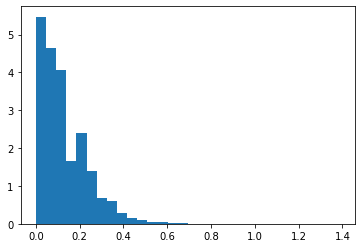

In [19]:
# Global reactive power
plt.hist(vdata['Global_reactive_power'], bins=30, normed=True)

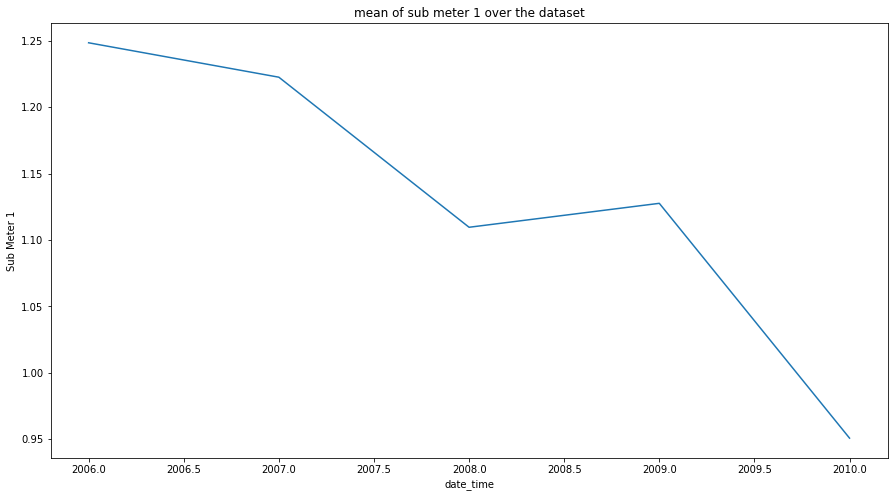

In [20]:
# mean trend of sub meter 1 over the whole dataset
sub01 = vdata.groupby(vdata.index.year).Sub_metering_1.mean()
plt.figure(figsize=(15,8)) 
sub01.plot(kind='line')
plt.xticks(rotation=0) 
plt.ylabel('Sub Meter 1')
plt.title('mean of sub meter 1 over the dataset')
plt.show()

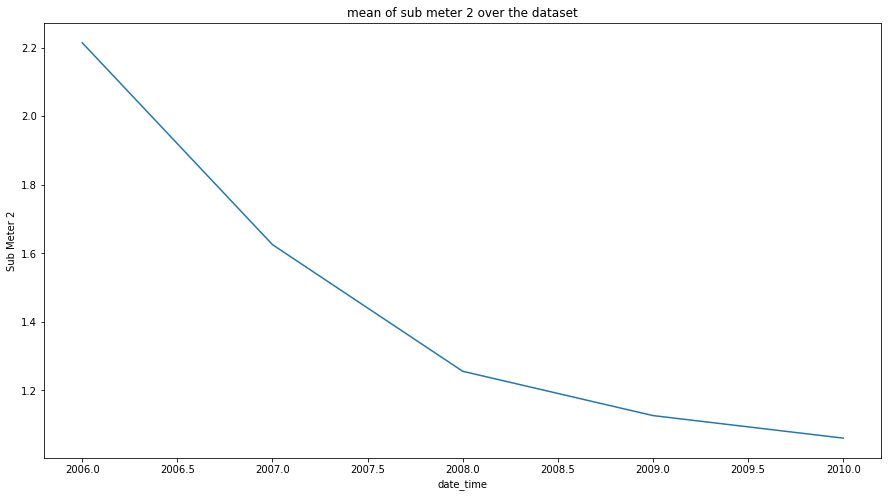

In [21]:
# mean trend of sub meter 2 over the whole dataset
sub02 = vdata.groupby(vdata.index.year).Sub_metering_2.mean()
plt.figure(figsize=(15,8)) 
sub02.plot(kind='line')
plt.xticks(rotation=0) 
plt.ylabel('Sub Meter 2')
plt.title('mean of sub meter 2 over the dataset')
plt.show()

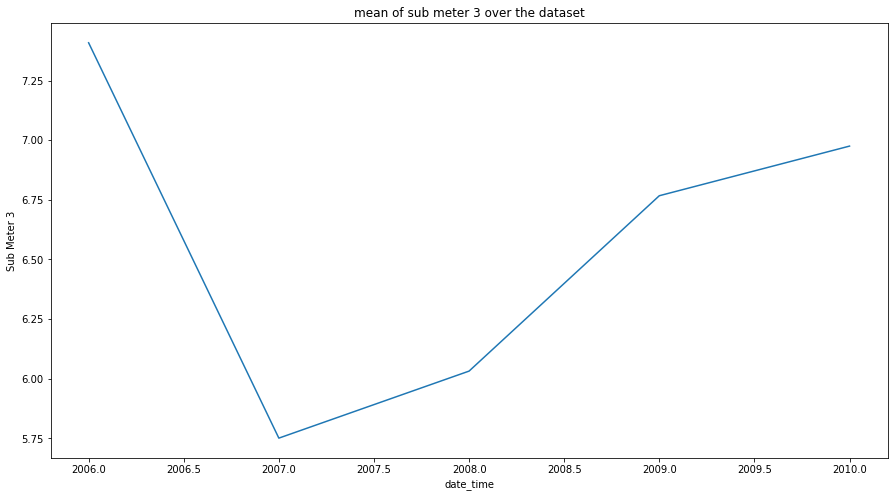

In [22]:
# mean trend of sub meter 3 over the whole dataset
sub03 = vdata.groupby(vdata.index.year).Sub_metering_3.mean()
plt.figure(figsize=(15,8)) 
sub03.plot(kind='line')
plt.xticks(rotation=0) 
plt.ylabel('Sub Meter 3')
plt.title('mean of sub meter 3 over the dataset')
plt.show()

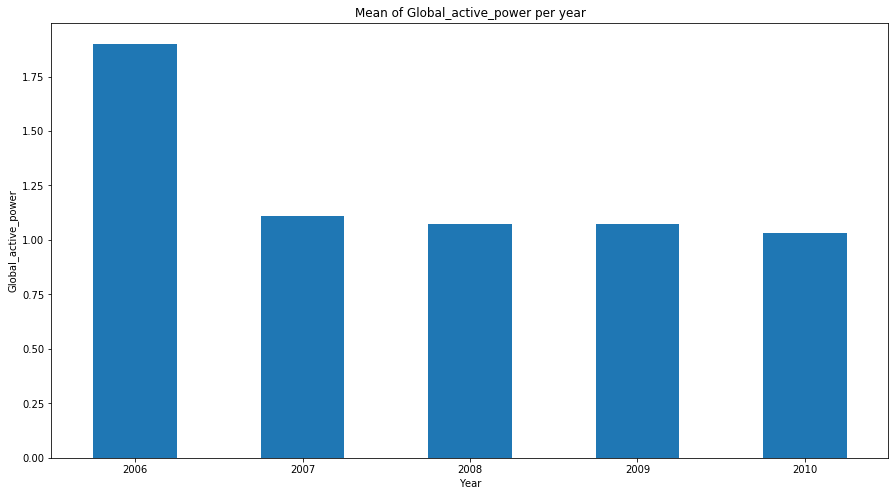

In [23]:
# mean of global active power per year
mean00 = vdata.groupby(vdata.index.year).Global_active_power.mean()
plt.figure(figsize=(15,8)) 
mean00.plot(kind='bar')
plt.xticks(rotation=0) 
plt.ylabel('Global_active_power')
plt.xlabel('Year')
plt.title('Mean of Global_active_power per year')
plt.show()

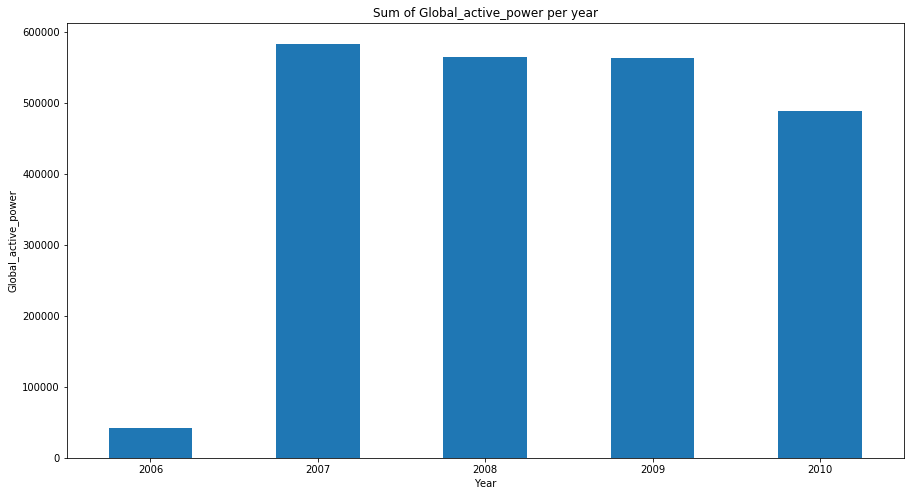

In [24]:
# sum of global active power per year
sum00 = vdata.groupby(vdata.index.year).Global_active_power.sum()
plt.figure(figsize=(15,8)) 
sum00.plot(kind='bar')
plt.xticks(rotation=0) 
plt.ylabel('Global_active_power')
plt.xlabel('Year')
plt.title('Sum of Global_active_power per year')
plt.show()

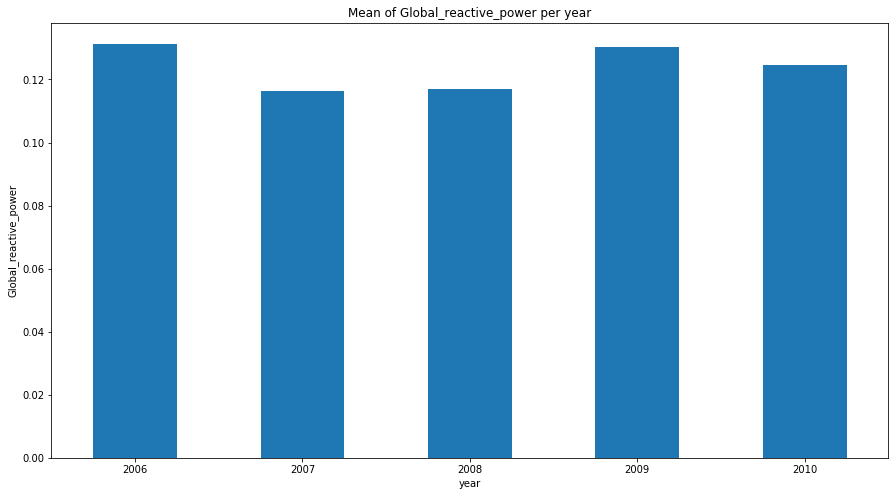

In [25]:
# mean of global reactive power per year
mean01 = vdata.groupby(vdata.index.year).Global_reactive_power.mean()
plt.figure(figsize=(15,8)) 
mean01.plot(kind='bar')
plt.xticks(rotation=0) 
plt.ylabel('Global_reactive_power')
plt.xlabel('year')
plt.title('Mean of Global_reactive_power per year')
plt.show()

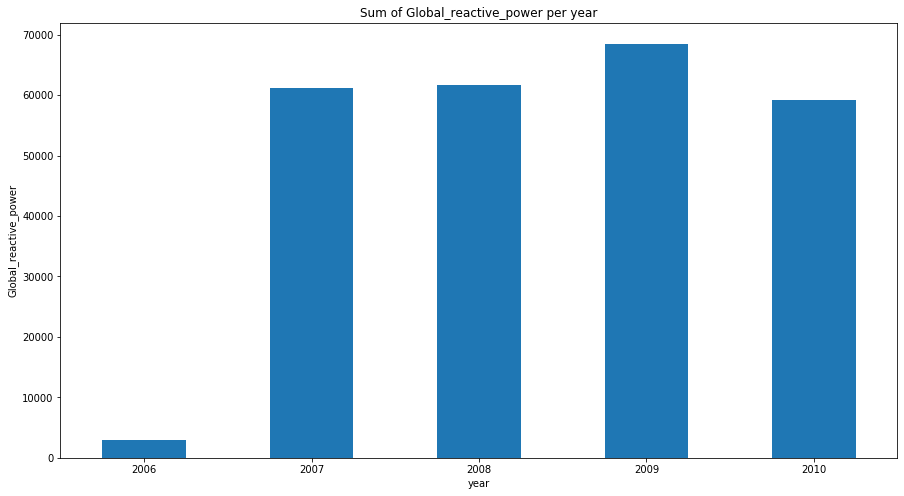

In [26]:
# sum of global reactive power per year
sum01 = vdata.groupby(vdata.index.year).Global_reactive_power.sum()
plt.figure(figsize=(15,8)) 
sum01.plot(kind='bar')
plt.xticks(rotation=0) 
plt.ylabel('Global_reactive_power')
plt.xlabel('year')
plt.title('Sum of Global_reactive_power per year')
plt.show()

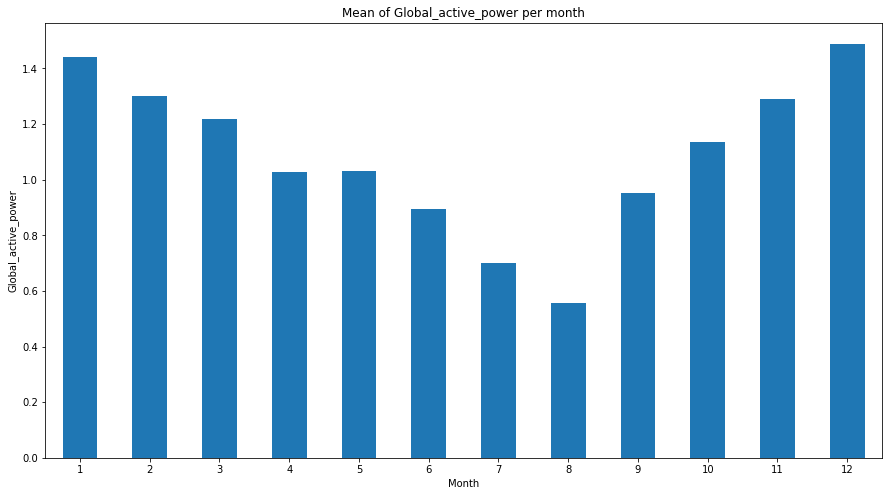

In [27]:
# mean of global active power per month
mean10 = vdata.groupby(vdata.index.month).Global_active_power.mean()
plt.figure(figsize=(15,8)) 
mean10.plot(kind='bar')
plt.xticks(rotation=0) 
plt.ylabel('Global_active_power')
plt.xlabel('Month')
plt.title('Mean of Global_active_power per month')
plt.show()

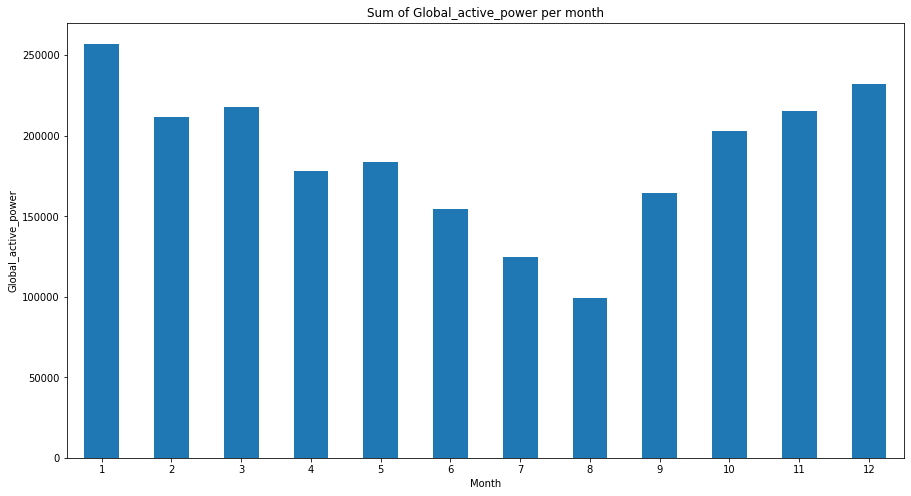

In [28]:
# sum of global active power per month
sum10 = vdata.groupby(vdata.index.month).Global_active_power.sum()
plt.figure(figsize=(15,8)) 
sum10.plot(kind='bar')
plt.xticks(rotation=0) 
plt.ylabel('Global_active_power')
plt.xlabel('Month')
plt.title('Sum of Global_active_power per month')
plt.show()

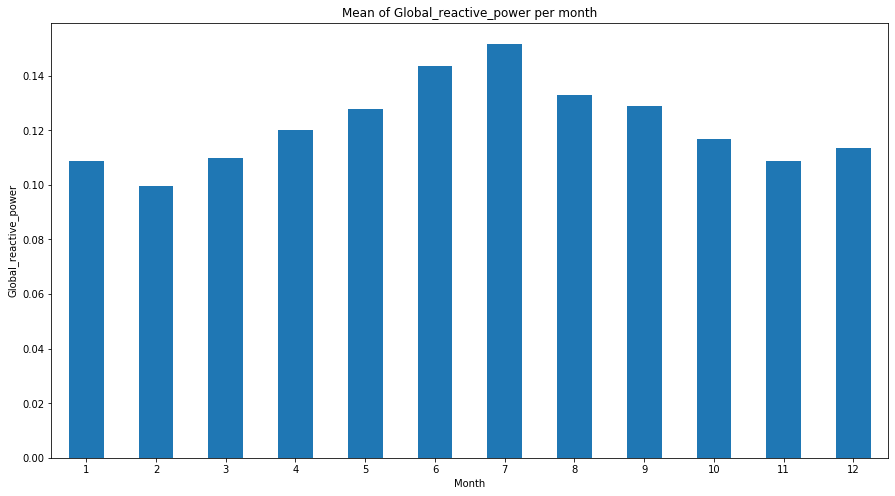

In [29]:
# mean of global reactive power per month
mean11 = vdata.groupby(vdata.index.month).Global_reactive_power.mean()
plt.figure(figsize=(15,8)) 
mean11.plot(kind='bar')
plt.xticks(rotation=0) 
plt.ylabel('Global_reactive_power')
plt.xlabel('Month')
plt.title('Mean of Global_reactive_power per month')
plt.show()

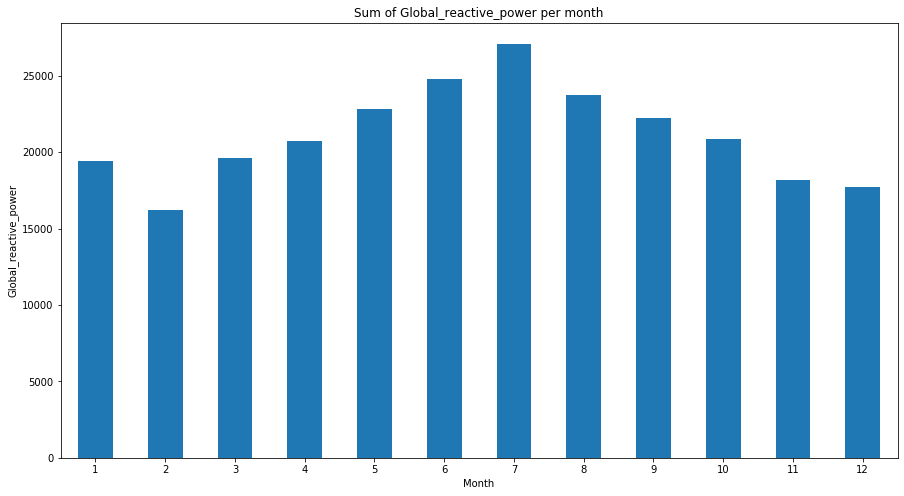

In [30]:
# sum of global reactive power per year
sum11 = vdata.groupby(vdata.index.month).Global_reactive_power.sum()
plt.figure(figsize=(15,8)) 
sum11.plot(kind='bar')
plt.xticks(rotation=0) 
plt.ylabel('Global_reactive_power')
plt.xlabel('Month')
plt.title('Sum of Global_reactive_power per month')
plt.show()

# 2006(last month of 2006)

In [31]:
vdata06 = vdata['2006']
vdata06.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


(array([732662., 732664., 732666., 732668., 732670., 732672., 732674.,
        732676., 732677.]),
 <a list of 9 Text xticklabel objects>)

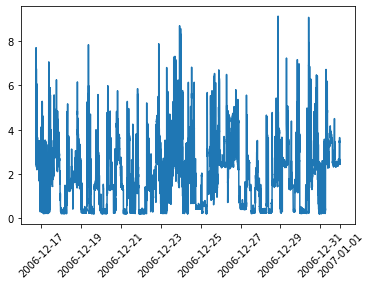

In [32]:
plt.plot(vdata06['Global_active_power'])
plt.xticks(rotation=45)

(array([732662., 732664., 732666., 732668., 732670., 732672., 732674.,
        732676., 732677.]),
 <a list of 9 Text xticklabel objects>)

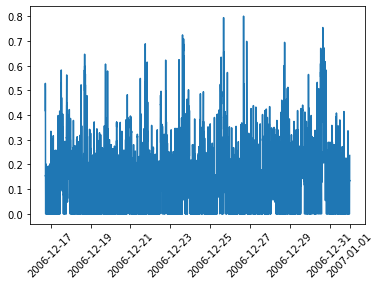

In [33]:
plt.plot(vdata06['Global_reactive_power'])
plt.xticks(rotation=45)

In [34]:
# Since the data is barely enough for 2006, we move to 2007

# 2007

In [35]:
vdata07 = vdata['2007']
vdata07.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2007-01-01 00:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0
2007-01-01 00:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0
2007-01-01 00:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0
2007-01-01 00:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0
2007-01-01 00:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0


#### Global_active_power 07

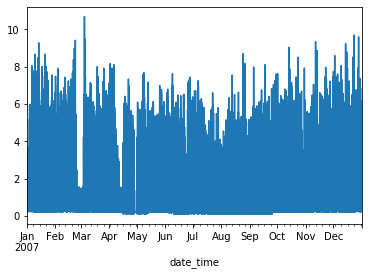

In [36]:
vdata07['Global_active_power'].plot(kind='line')

C:\Users\Kenechi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


(array([1.30544314e+00, 1.39057441e+00, 2.95080758e-01, 1.31438106e-01,
        9.49748401e-02, 7.97081386e-02, 3.45225835e-01, 5.18453302e-01,
        2.64482666e-01, 1.63750468e-01, 1.25066199e-01, 9.46513931e-02,
        1.12268477e-01, 1.16322346e-01, 8.28779199e-02, 6.80424811e-02,
        5.49428749e-02, 4.83337732e-02, 5.13310494e-02, 5.63983867e-02,
        5.03499266e-02, 3.68082761e-02, 2.87652257e-02, 2.30294311e-02,
        1.82208514e-02, 1.53421725e-02, 1.32721113e-02, 1.24311489e-02,
        1.04904665e-02, 8.91635745e-03, 8.38806058e-03, 8.84088647e-03,
        7.45006409e-03, 5.47703698e-03, 4.15090401e-03, 3.43932047e-03,
        2.52288711e-03, 1.46629337e-03, 1.08893846e-03, 1.03503061e-03,
        1.02424904e-03, 1.11050159e-03, 9.16433354e-04, 8.84088647e-04,
        9.05651785e-04, 2.58757653e-04, 2.37194515e-04, 1.29378826e-04,
        1.18597258e-04, 6.46894132e-05, 2.15631377e-05, 1.07815689e-04,
        8.62525509e-05, 2.15631377e-05, 1.07815689e-05, 1.078156

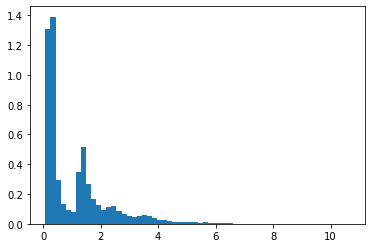

In [37]:
# Distribution of active power in 2007
plt.hist(vdata07['Global_active_power'], bins=60, normed=True)

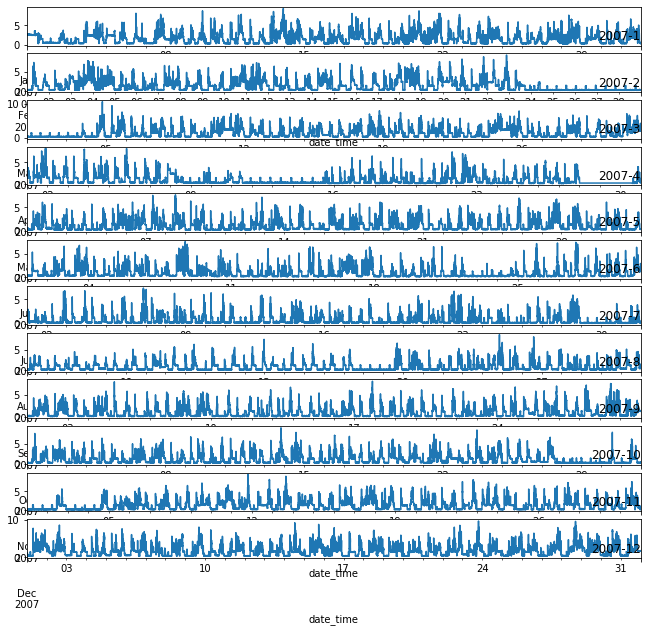

In [38]:
# trend of active power for each month in 2007
plt.figure(figsize=(11,11))
for i in range(1,13):
     # getting the subplot
    ax = plt.subplot(13, 1, i+1)
    month = '2007-' + f'{i}'
    vdata07 = vdata[month]
    # plotting the active power for the month
    vdata07['Global_active_power'].plot()
    # adding a title
    plt.title(month, y=0, loc='right')
plt.show()

#### Global_reactive_power 07

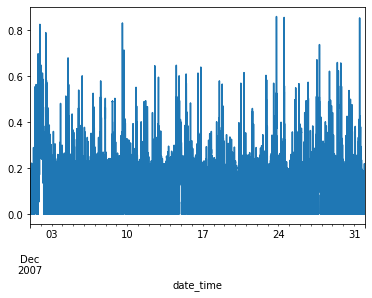

In [39]:
vdata07['Global_reactive_power'].plot()

C:\Users\Kenechi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


(array([1.03861903e+01, 1.81920480e+00, 4.10180670e+00, 5.81395349e+00,
        3.14453613e+00, 1.31517254e+00, 1.53475869e+00, 1.78638410e+00,
        1.52225556e+00, 7.86134034e-01, 4.68085771e-01, 4.78244561e-01,
        4.23543386e-01, 3.12578145e-01, 2.35996499e-01, 2.11771693e-01,
        1.99268567e-01, 1.14872468e-01, 6.72043011e-02, 5.93898475e-02,
        3.20392598e-02, 3.12578145e-02, 1.09402351e-02, 3.90722681e-03,
        3.12578145e-03, 1.56289072e-03, 1.56289072e-03, 7.81445361e-03,
        5.47011753e-03, 4.68867217e-03]),
 array([0.        , 0.02866667, 0.05733333, 0.086     , 0.11466667,
        0.14333333, 0.172     , 0.20066667, 0.22933333, 0.258     ,
        0.28666667, 0.31533333, 0.344     , 0.37266667, 0.40133333,
        0.43      , 0.45866667, 0.48733333, 0.516     , 0.54466667,
        0.57333333, 0.602     , 0.63066667, 0.65933333, 0.688     ,
        0.71666667, 0.74533333, 0.774     , 0.80266667, 0.83133333,
        0.86      ]),
 <a list of 30 Patch obj

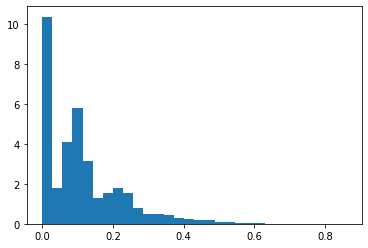

In [40]:
plt.hist(vdata07['Global_reactive_power'], bins=30, normed=True)

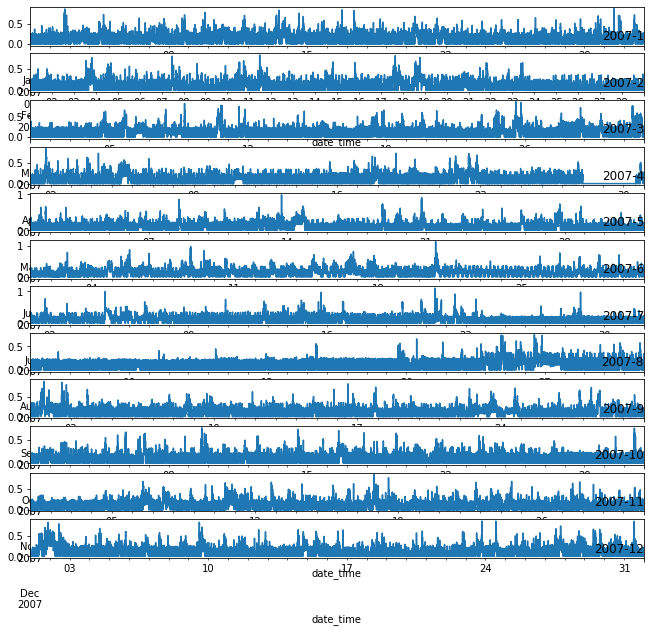

In [41]:
# Trend of reactive power for each month in 2007
plt.figure(figsize=(11,11))
for i in range(1,13):
     # getting the subplot
    ax = plt.subplot(13, 1, i+1)
    month = '2007-' + f'{i}'
    vdata07 = vdata[month]
    # plotting the active power for the month
    vdata07['Global_reactive_power'].plot()
    # adding a title
    plt.title(month, y=0, loc='right')
plt.show()

# 2008

#### Global active power

In [42]:
vdata08 = vdata['2008']
vdata08.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2008-01-01 00:00:00,1.620,0.070,241.25,6.6,0.0,0.0,18.0
2008-01-01 00:01:00,1.626,0.072,241.74,6.6,0.0,0.0,18.0
2008-01-01 00:02:00,1.622,0.072,241.52,6.6,0.0,0.0,18.0
2008-01-01 00:03:00,1.612,0.070,240.82,6.6,0.0,0.0,18.0
2008-01-01 00:04:00,1.612,0.070,240.80,6.6,0.0,0.0,18.0


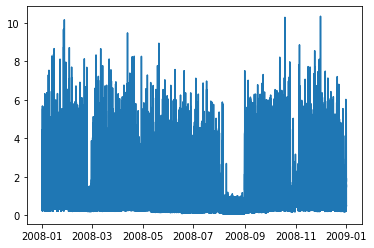

In [43]:
plt.plot(vdata08['Global_active_power'])

#### From the trend displayed above, a noticeable drop in active power occured towards the end of august

C:\Users\Kenechi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


(array([1.21842421e+00, 3.81201226e-01, 1.41960620e-01, 3.51244200e-01,
        2.99514854e-01, 1.40148569e-01, 9.04806388e-02, 8.07221623e-02,
        5.56970174e-02, 3.87069612e-02, 4.19376209e-02, 2.56402447e-02,
        1.60369285e-02, 1.05841512e-02, 8.57814974e-03, 6.07341868e-03,
        4.33894783e-03, 3.12537238e-03, 2.06695727e-03, 1.24682409e-03,
        9.03254785e-04, 5.87392682e-04, 5.87392682e-04, 3.54652186e-04,
        9.97459272e-05, 1.60701772e-04, 6.09558444e-05, 3.32486424e-05,
        1.66243212e-05, 2.77072020e-05]),
 array([ 0.076 ,  0.4184,  0.7608,  1.1032,  1.4456,  1.788 ,  2.1304,
         2.4728,  2.8152,  3.1576,  3.5   ,  3.8424,  4.1848,  4.5272,
         4.8696,  5.212 ,  5.5544,  5.8968,  6.2392,  6.5816,  6.924 ,
         7.2664,  7.6088,  7.9512,  8.2936,  8.636 ,  8.9784,  9.3208,
         9.6632, 10.0056, 10.348 ]),
 <a list of 30 Patch objects>)

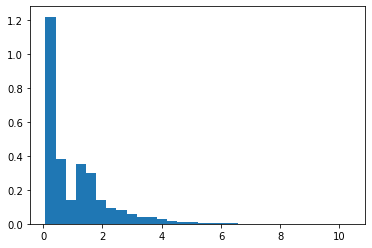

In [44]:
# Distribution of active power in 2008
plt.hist(vdata08['Global_active_power'], bins=30, normed=True)

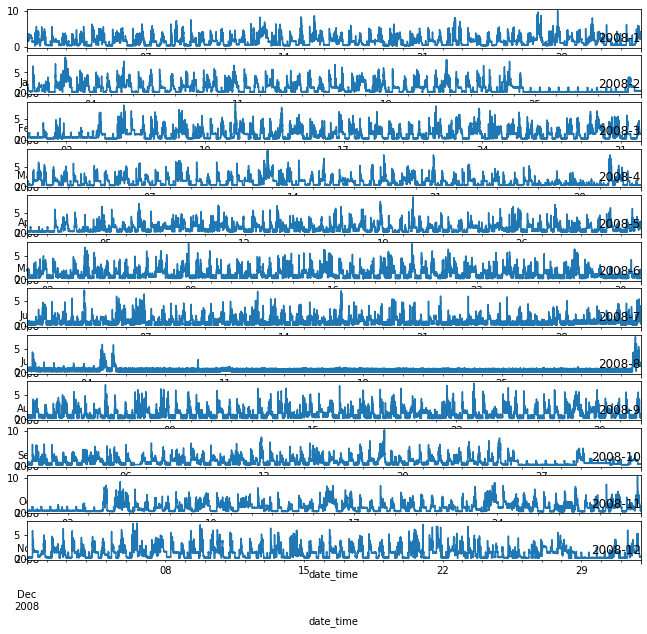

In [45]:
# trend of active power for each month in 2008
plt.figure(figsize=(11,11))
for i in range(1,13):
     # getting the subplot
    ax = plt.subplot(13, 1, i+1)
    month = '2008-' + f'{i}'
    
    vdata08 = vdata[month]
    # plotting the active power for the month
    vdata08['Global_active_power'].plot()
    # adding a title
    plt.title(month, y=0, loc='right')
plt.show()

#### Global reactive power

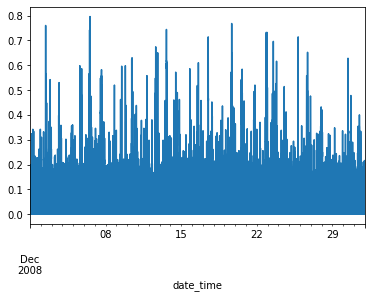

In [46]:
vdata08['Global_reactive_power'].plot()

C:\Users\Kenechi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


(array([8.95607068e+00, 3.36021505e+00, 9.48205409e+00, 5.88628627e+00,
        1.64886935e+00, 1.23095315e+00, 1.62691819e+00, 1.94689847e+00,
        1.18029664e+00, 5.43713190e-01, 3.42775706e-01, 3.74858162e-01,
        2.98873399e-01, 1.80674880e-01, 1.08911493e-01, 1.36772573e-01,
        9.11817150e-02, 5.48778840e-02, 4.55908575e-02, 4.13694818e-02,
        3.46152807e-02, 2.70168045e-02, 3.29267304e-02, 1.77297779e-02,
        9.28702653e-03, 1.09755768e-02, 3.37710056e-03, 9.28702653e-03,
        3.37710056e-03, 1.68855028e-03]),
 array([0.        , 0.02653333, 0.05306667, 0.0796    , 0.10613333,
        0.13266667, 0.1592    , 0.18573333, 0.21226667, 0.2388    ,
        0.26533333, 0.29186667, 0.3184    , 0.34493333, 0.37146667,
        0.398     , 0.42453333, 0.45106667, 0.4776    , 0.50413333,
        0.53066667, 0.5572    , 0.58373333, 0.61026667, 0.6368    ,
        0.66333333, 0.68986667, 0.7164    , 0.74293333, 0.76946667,
        0.796     ]),
 <a list of 30 Patch obj

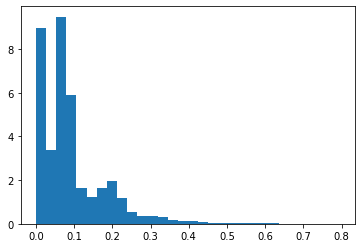

In [47]:
plt.hist(vdata08['Global_reactive_power'], bins=30, normed=True)

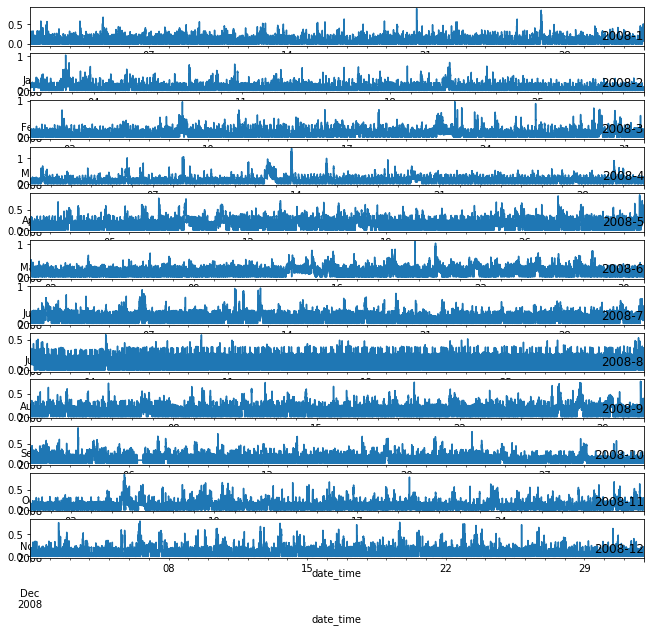

In [48]:
# trend of reactive power for each month in 2008
plt.figure(figsize=(11,11))
for i in range(1,13):
     # getting the subplot
    ax = plt.subplot(13, 1, i+1)
    month = '2008-' + f'{i}'
    
    vdata08 = vdata[month]
    # plotting the active power for the month
    vdata08['Global_reactive_power'].plot()
    # adding a title
    plt.title(month, y=0, loc='right')
plt.show()

# 2009

In [49]:
vdata09 = vdata['2009']
vdata09.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2009-01-01 00:00:00,0.484,0.062,247.86,2.2,0.0,0.0,0.0
2009-01-01 00:01:00,0.484,0.062,247.72,2.2,0.0,0.0,0.0
2009-01-01 00:02:00,0.482,0.062,247.75,2.2,0.0,0.0,0.0
2009-01-01 00:03:00,0.482,0.060,247.52,2.2,0.0,0.0,0.0
2009-01-01 00:04:00,0.482,0.062,246.94,2.2,0.0,0.0,0.0


#### Global Active Power

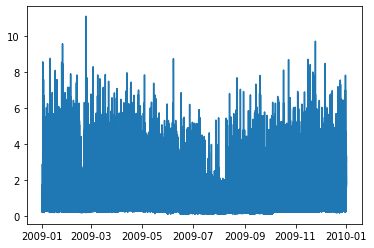

In [50]:
plt.plot(vdata09['Global_active_power'])

C:\Users\Kenechi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


(array([1.25680780e+00, 2.23822125e-01, 1.32798879e-01, 5.16988377e-01,
        2.10175384e-01, 1.10014529e-01, 8.13926941e-02, 6.03102947e-02,
        3.37121212e-02, 3.01888751e-02, 2.40711914e-02, 1.41708178e-02,
        1.02739726e-02, 7.76774595e-03, 4.92424242e-03, 3.62702366e-03,
        2.57887090e-03, 1.34910751e-03, 9.39186384e-04, 3.83976754e-04,
        3.42465753e-04, 3.26899128e-04, 1.60855127e-04, 8.82108759e-05,
        5.18887505e-06, 5.18887505e-06, 3.63221254e-05, 0.00000000e+00,
        5.18887505e-06, 5.18887505e-06]),
 array([ 0.122     ,  0.48866667,  0.85533333,  1.222     ,  1.58866667,
         1.95533333,  2.322     ,  2.68866667,  3.05533333,  3.422     ,
         3.78866667,  4.15533333,  4.522     ,  4.88866667,  5.25533333,
         5.622     ,  5.98866667,  6.35533333,  6.722     ,  7.08866667,
         7.45533333,  7.822     ,  8.18866667,  8.55533333,  8.922     ,
         9.28866667,  9.65533333, 10.022     , 10.38866667, 10.75533333,
        11.122  

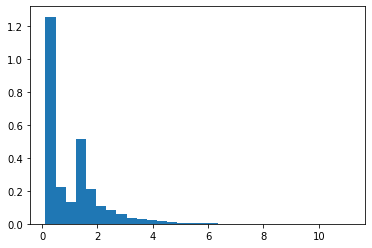

In [51]:
# Distribution of active power in 2009
plt.hist(vdata09['Global_active_power'], bins=30, normed=True)

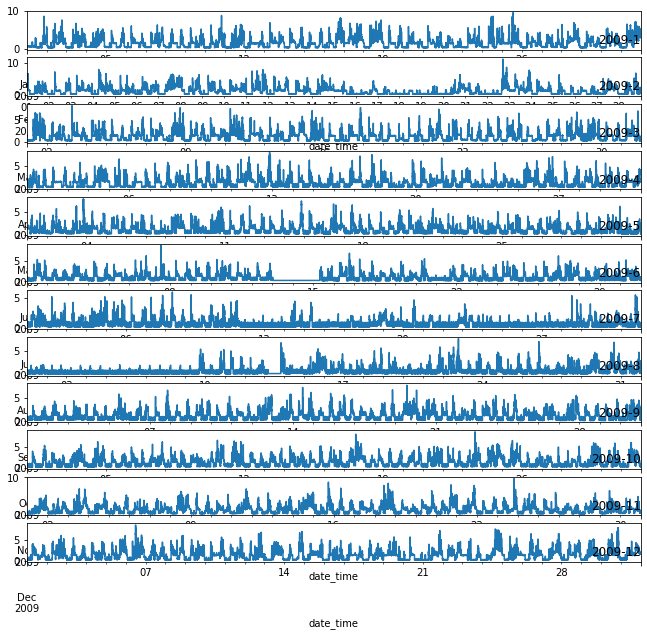

In [52]:
# trend of active power for each month in 2009
plt.figure(figsize=(11,11))
for i in range(1,13):
     # getting the subplot
    ax = plt.subplot(13, 1, i+1)
    month = '2009-' + f'{i}'
    
    vdata09 = vdata[month]
    # plotting the active power for the month
    vdata09['Global_active_power'].plot()
    # adding a title
    plt.title(month, y=0, loc='right')
plt.show()

#### Global reactive power

(array([733742., 733746., 733750., 733754., 733758., 733762., 733766.,
        733770., 733773.]),
 <a list of 9 Text xticklabel objects>)

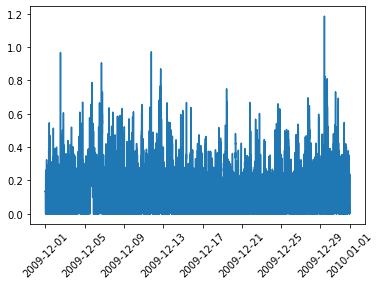

In [64]:
plt.plot(vdata09['Global_reactive_power'])
plt.xticks(rotation=45) 

C:\Users\Kenechi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


(array([6.89099077e+00, 2.43771419e+00, 4.40737819e+00, 3.67697057e+00,
        1.29988758e+00, 2.00819598e+00, 1.77190430e+00, 8.20504452e-01,
        6.04045404e-01, 4.52184083e-01, 2.73690366e-01, 2.25525395e-01,
        1.60361022e-01, 8.89635352e-02, 5.66646721e-02, 4.58983844e-02,
        2.09659287e-02, 1.75660483e-02, 1.24662279e-02, 7.93305409e-03,
        5.09982049e-03, 3.96652704e-03, 2.83323360e-03, 1.13329344e-03,
        1.13329344e-03, 5.66646721e-04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.66646721e-04]),
 array([0.        , 0.03953333, 0.07906667, 0.1186    , 0.15813333,
        0.19766667, 0.2372    , 0.27673333, 0.31626667, 0.3558    ,
        0.39533333, 0.43486667, 0.4744    , 0.51393333, 0.55346667,
        0.593     , 0.63253333, 0.67206667, 0.7116    , 0.75113333,
        0.79066667, 0.8302    , 0.86973333, 0.90926667, 0.9488    ,
        0.98833333, 1.02786667, 1.0674    , 1.10693333, 1.14646667,
        1.186     ]),
 <a list of 30 Patch obj

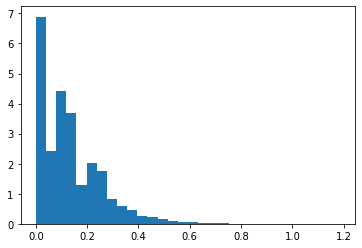

In [54]:
plt.hist(vdata09['Global_reactive_power'], bins=30, normed=True)

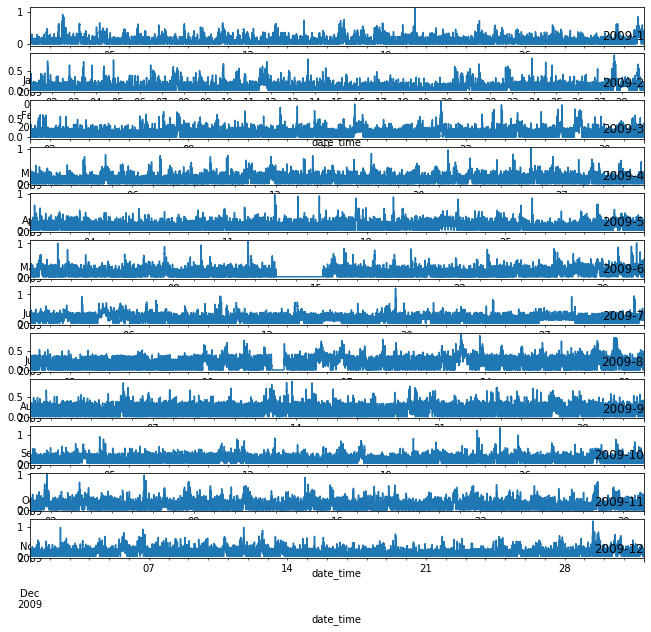

In [55]:
# trend of reactive power for each month in 2009
plt.figure(figsize=(11,11))
for i in range(1,13):
     # getting the subplot
    ax = plt.subplot(13, 1, i+1)
    month = '2009-' + f'{i}'
    vdata09 = vdata[month]
    # plotting the active power for the month
    vdata09['Global_reactive_power'].plot()
    # adding a title
    plt.title(month, y=0, loc='right')
plt.show()

# 2010

In [56]:
vdata10 = vdata['2010']
vdata10.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2010-01-01 00:00:00,1.790,0.236,240.65,7.4,0.0,0.0,18.0
2010-01-01 00:01:00,1.780,0.234,240.07,7.4,0.0,0.0,18.0
2010-01-01 00:02:00,1.780,0.234,240.15,7.4,0.0,0.0,19.0
2010-01-01 00:03:00,1.746,0.186,240.26,7.2,0.0,0.0,18.0
2010-01-01 00:04:00,1.686,0.102,240.12,7.0,0.0,0.0,18.0


#### Global active power

(array([734077., 734081., 734085., 734089., 734093., 734097., 734101.]),
 <a list of 7 Text xticklabel objects>)

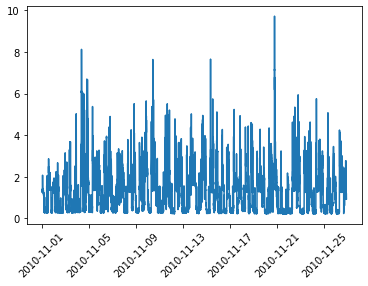

In [65]:
plt.plot(vdata10['Global_active_power'])
plt.xticks(rotation=45) 

C:\Users\Kenechi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


(array([1.37522193e+00, 2.97742180e-01, 1.75293213e-01, 3.39030659e-01,
        4.13260322e-01, 1.73072977e-01, 1.01616962e-01, 8.18456641e-02,
        4.87793043e-02, 2.92978885e-02, 2.57731819e-02, 2.43962404e-02,
        1.21552967e-02, 9.54635493e-03, 7.26682505e-03, 4.74353040e-03,
        3.24800068e-03, 2.56941230e-03, 2.00941218e-03, 9.42117844e-04,
        4.80941277e-04, 5.27058934e-04, 2.24000047e-04, 1.91058863e-04,
        1.58117680e-04, 8.56470767e-05, 2.63529467e-05, 1.31764733e-05,
        1.31764733e-05, 3.29411833e-05]),
 array([0.138     , 0.45753333, 0.77706667, 1.0966    , 1.41613333,
        1.73566667, 2.0552    , 2.37473333, 2.69426667, 3.0138    ,
        3.33333333, 3.65286667, 3.9724    , 4.29193333, 4.61146667,
        4.931     , 5.25053333, 5.57006667, 5.8896    , 6.20913333,
        6.52866667, 6.8482    , 7.16773333, 7.48726667, 7.8068    ,
        8.12633333, 8.44586667, 8.7654    , 9.08493333, 9.40446667,
        9.724     ]),
 <a list of 30 Patch obj

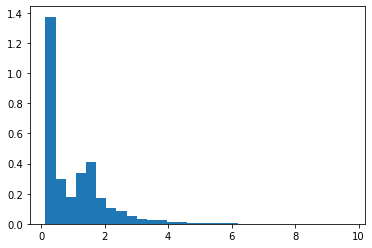

In [58]:
# Distribution of active power in 2010
plt.hist(vdata10['Global_active_power'], bins=30, normed=True)

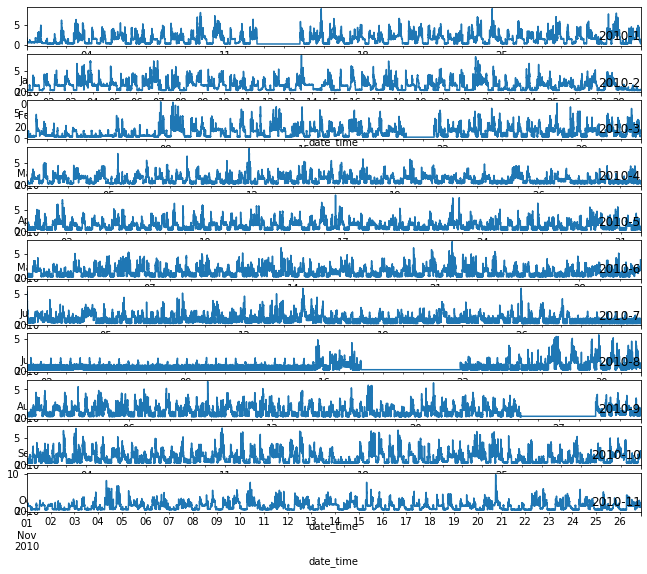

In [59]:
# trend of active power for each month in 2010
plt.figure(figsize=(11,11))
for i in range(1,12):
     # getting the subplot
    ax = plt.subplot(13, 1, i+1)
    month = '2010-' + f'{i}'
    
    vdata10 = vdata[month]
    # plotting the active power for the month
    vdata10['Global_active_power'].plot()
    # adding a title
    plt.title(month, y=0, loc='right')
plt.show()

#### Global reactive power

(array([734077., 734081., 734085., 734089., 734093., 734097., 734101.]),
 <a list of 7 Text xticklabel objects>)

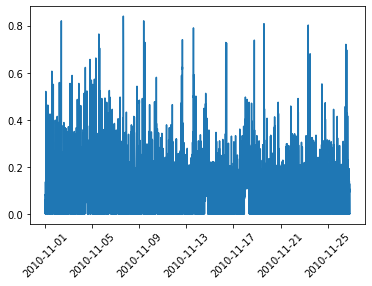

In [66]:
plt.plot(vdata10['Global_reactive_power'])
plt.xticks(rotation=45) 

C:\Users\Kenechi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


(array([7.21991558e+00, 3.59318512e+00, 7.45569140e+00, 4.39731484e+00,
        2.15648614e+00, 1.98396724e+00, 2.37692694e+00, 2.32421283e+00,
        9.88149869e-01, 8.84638535e-01, 6.07649871e-01, 4.74426950e-01,
        2.84656170e-01, 2.70279596e-01, 1.46641057e-01, 1.16929470e-01,
        1.11178841e-01, 7.85919392e-02, 5.17556672e-02, 3.73790930e-02,
        4.12128461e-02, 1.91687656e-02, 1.53350125e-02, 1.34181360e-02,
        1.82103274e-02, 1.82103274e-02, 6.70906798e-03, 4.79219141e-03,
        8.62594454e-03, 8.62594454e-03]),
 array([0.   , 0.028, 0.056, 0.084, 0.112, 0.14 , 0.168, 0.196, 0.224,
        0.252, 0.28 , 0.308, 0.336, 0.364, 0.392, 0.42 , 0.448, 0.476,
        0.504, 0.532, 0.56 , 0.588, 0.616, 0.644, 0.672, 0.7  , 0.728,
        0.756, 0.784, 0.812, 0.84 ]),
 <a list of 30 Patch objects>)

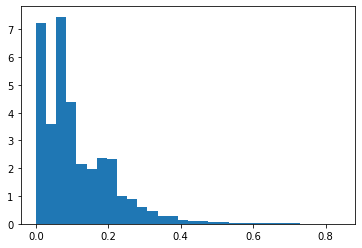

In [61]:
plt.hist(vdata10['Global_reactive_power'], bins=30, normed=True)

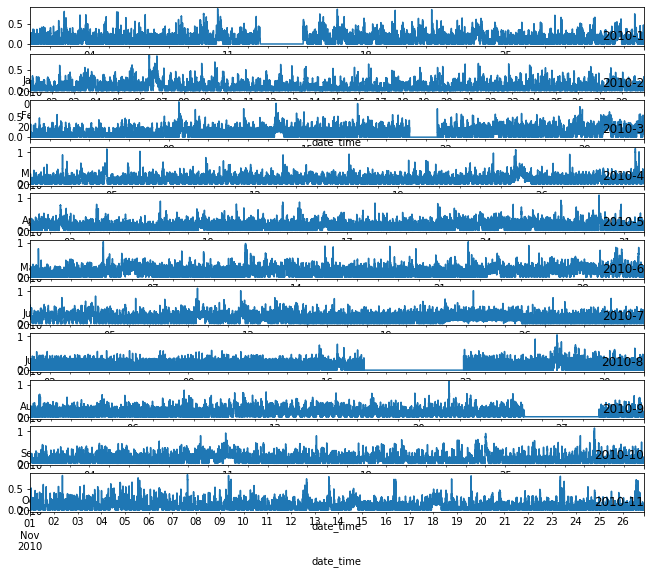

In [62]:
# trend of reactive power for each month in 2010
plt.figure(figsize=(11,11))
for i in range(1,12):
     # getting the subplot
    ax = plt.subplot(13, 1, i+1)
    month = '2010-' + f'{i}'
    
    vdata10 = vdata[month]
    # plotting the active power for the month
    vdata10['Global_reactive_power'].plot()
    # adding a title
    plt.title(month, y=0, loc='right')
plt.show()